In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,precision_recall_fscore_support, confusion_matrix,r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline
import pickle
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer




## Data reading, feature selection

In [42]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

data = data.dropna()

print(data.isna().sum())
print(data['Genre'].unique())
print(data.dtypes)
##Nagggyon sok 0 kozeli, igy is lesz eleg ertek 
print(data['Global_Sales'])
print(data['Global_Sales'].isnull().count())
#Kiszedjuk az ismeretlen jatekokat
data = data[data['Global_Sales'] >= 0.2]
data = data.drop(['Other_Sales'], axis=1)
data = data.drop(['JP_Sales'], axis=1)
data['Year_of_Release'] = data['Year_of_Release'].astype(int)
data['User_Count'] = data['User_Count'].astype(int)
data['User_Score'] = data['User_Score'].mul(10).astype(int)
data['Critic_Count'] = data['Critic_Count'].astype(int)
data['Critic_Score'] = data['Critic_Score'].astype(int)
data['NA_Sales'] = data['NA_Sales'].mul(100).astype(int)
data['EU_Sales'] = data['EU_Sales'].mul(100).astype(int)
data['Global_Sales'] = data['Global_Sales'].mul(100).astype(int)

print(data['NA_Sales'].max)
data.head(10)

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64
['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object
0        82.53
2        35.52
3        32.77
6        29.80
7        28.92
 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,4136,2896,8253,76,51,80,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,1568,1276,3552,82,73,83,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,1561,1093,3277,80,73,80,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,1128,914,2980,89,65,85,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,1396,918,2892,58,41,66,129,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,1444,694,2832,87,80,84,594,Nintendo,E
11,Mario Kart DS,DS,2005,Racing,Nintendo,971,747,2321,91,64,86,464,Nintendo,E
13,Wii Fit,Wii,2007,Sports,Nintendo,892,802,2270,80,63,77,146,Nintendo,E
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,1500,488,2181,61,45,63,106,Good Science Studio,E
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,901,849,2179,80,33,74,52,Nintendo,E


## LabelEncoding, Splittin

In [58]:

# Load the data
y = data['Genre']
X = data.drop(['Genre', 'Name'], axis=1)

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)
with open('encoder_y.pkl', 'wb') as file:
    pickle.dump(label_encoder_y, file)

label_encoder_rating = LabelEncoder()
X['Rating']=label_encoder_rating.fit_transform(X['Rating'])
with open('encoder_rating.pkl', 'wb') as file:
    pickle.dump(label_encoder_rating, file)

label_encoder_platform = LabelEncoder()
X['Platform']=label_encoder_platform.fit_transform(X['Platform'])
with open('encoder_platform.pkl', 'wb') as file:
    pickle.dump(label_encoder_platform, file)

label_encoder_publisher = LabelEncoder()
X['Publisher']=label_encoder_publisher.fit_transform(X['Publisher'])
with open('encoder_publisher.pkl', 'wb') as file:
    pickle.dump(label_encoder_publisher, file)

label_encoder_developer = LabelEncoder()
X['Developer']=label_encoder_developer.fit_transform(X['Developer'])
with open('encoder_developer.pkl', 'wb') as file:
    pickle.dump(label_encoder_developer, file)
\

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# Apply standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## RandomForest
### Feature 
### HyperParameter

In [61]:


X_rf = X
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=420)
rf_classifier = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 300)
rf_classifier.fit(X_train,y=y_train)
y_pred = rf_classifier.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)
X_test

0.562874251497006
MAE: 2.3221556886227543


,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
275,7,2003,101,88,229,420,80,32,75,22,617,1
4640,8,2010,28,27,9,42,58,47,62,28,539,5
2600,9,2015,61,13,42,79,87,54,71,680,382,1
7572,14,2008,126,16,2,20,52,27,70,48,755,4
4589,14,2009,5,23,15,42,71,56,59,18,77,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3438,7,2004,30,49,2,57,73,35,82,60,215,5
7513,8,2006,77,6,0,20,33,31,51,47,76,5
2162,4,2003,115,74,19,95,71,10,86,34,313,1
5094,14,2009,30,12,21,37,66,19,64,9,208,1


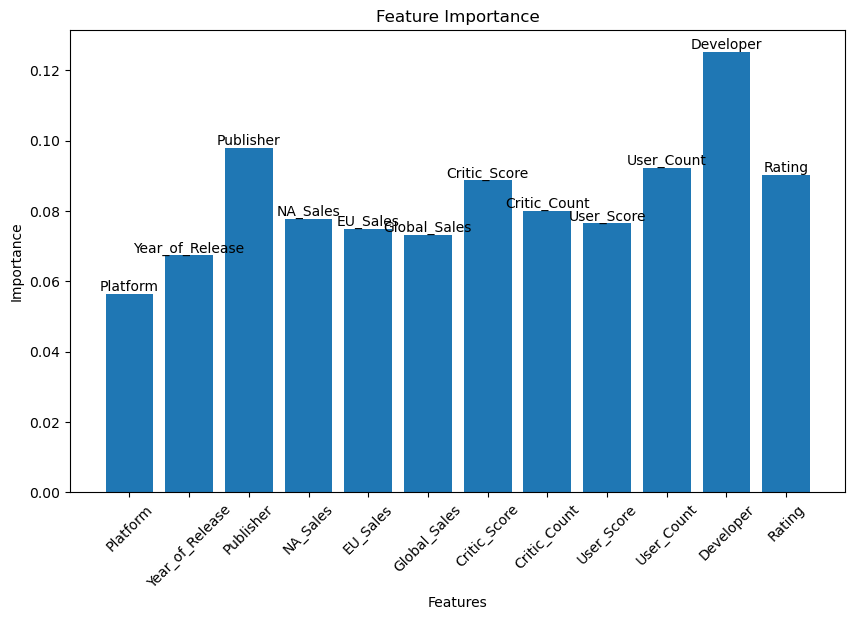

In [60]:

importance_values = rf_classifier.feature_importances_
feature_names = X_rf.columns

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_names)), importance_values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)  


for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, feature_names[i], ha='center', va='bottom')

plt.show()


In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))


## SVM

In [62]:
svm = SVC(C= 10, gamma= 0.1, kernel= 'rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

0.23353293413173654
MAE: 5.292215568862275


In [180]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}


svm_classifier = SVC()


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [1]:

svm = SVC(**best_params)
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

NameError: name 'SVC' is not defined

## LogisticRegression 

In [60]:
X_lr = X
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.2, random_state=420)
lr = LogisticRegression(C= 10, penalty= 'l2',solver= 'liblinear')
lr.fit(X_train,y_train)

st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)  
X_test= st_x.transform(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)


Accuracy: 0.5592814371257485
MAE: 2.325748502994012


In [66]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_classifier = LogisticRegression()

grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-pack

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [68]:
best_logistic_classifier = LogisticRegression(**best_params)
best_logistic_classifier.fit(X_train, y_train)

y_pred = best_logistic_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.72      0.47       349
           1       0.00      0.00      0.00        51
           2       0.22      0.03      0.05        67
           3       0.00      0.00      0.00        84
           4       0.16      0.10      0.13        78
           5       0.43      0.12      0.18        26
           6       0.14      0.02      0.03       125
           7       0.34      0.18      0.24       137
           8       0.22      0.17      0.19       155
           9       0.00      0.00      0.00        62
          10       0.39      0.74      0.51       183
          11       0.29      0.10      0.15        48

    accuracy                           0.34      1365
   macro avg       0.21      0.18      0.16      1365
weighted avg       0.25      0.34      0.26      1365

0.3362637362637363


c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ADABOOSTING

In [8]:
rf =  RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 300)

ada_classifier = AdaBoostClassifier(base_estimator=rf)

param_grid = {
    'n_estimators': [3, 5, 10],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


test_accuracy = best_model.score(X_test, y_test)

print("Best hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

with open('Ada_classifier.pkl', 'wb') as f:
    pickle.dump(ada_classifier, f)

c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed 

Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 10}
Test Accuracy: 0.5616766467065868


## FNN

In [70]:
unique_genres = data['Genre'].nunique()
num_classes = unique_genres
input_dim = X.shape[1]

print("Input dimension:", input_dim)
print("Number of unique genres:", num_classes)
X

Input dimension: 12
Number of unique genres: 12


,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,12,2006,80,4136,2896,8253,76,51,80,322,477,1
2,12,2008,80,1568,1276,3552,82,73,83,709,477,1
3,12,2009,80,1561,1093,3277,80,73,80,192,477,1
6,2,2006,80,1128,914,2980,89,65,85,431,477,1
7,12,2006,80,1396,918,2892,58,41,66,129,477,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7706,2,2010,80,8,4,20,76,40,79,23,172,2
7707,7,2001,101,10,7,20,57,11,40,4,17,1
7708,7,2008,45,7,5,20,70,12,82,17,303,5
7709,7,2003,96,10,7,20,57,19,80,21,524,5


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



In [10]:
def create_model(hidden_units=64, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_dim=input_dim))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [150]:
fnn_model = KerasClassifier(build_fn=create_model)

# Define the parameter grid for grid search
param_grid = {
    'hidden_units': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [50,100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=fnn_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

Epoch 1/50


C:\Users\jooda\AppData\Local\Temp\ipykernel_20340\2331746403.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  fnn_model = KerasClassifier(build_fn=create_model)


70/70 [==============================] - 2s 1ms/step - loss: 50.1809 - accuracy: 0.1556
Epoch 2/50
70/70 [==============================] - 0s 2ms/step - loss: 12.5887 - accuracy: 0.1592
Epoch 3/50
70/70 [==============================] - 0s 1ms/step - loss: 9.3607 - accuracy: 0.1668
Epoch 4/50
70/70 [==============================] - 0s 1ms/step - loss: 9.7197 - accuracy: 0.1713
Epoch 5/50
70/70 [==============================] - 0s 1ms/step - loss: 9.5893 - accuracy: 0.1731
Epoch 6/50
70/70 [==============================] - 0s 1ms/step - loss: 6.8275 - accuracy: 0.1911
Epoch 7/50
70/70 [==============================] - 0s 1ms/step - loss: 8.6142 - accuracy: 0.1785
Epoch 8/50
70/70 [==============================] - 0s 1ms/step - loss: 7.0574 - accuracy: 0.1808
Epoch 9/50
70/70 [==============================] - 0s 1ms/step - loss: 7.6486 - accuracy: 0.1803
Epoch 10/50
70/70 [==============================] - 0s 1ms/step - loss: 7.5427 - accuracy: 0.1875
Epoch 11/50
70/70 [=========

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000016C14F8EF50>,
             param_grid={'epochs': [50, 100], 'hidden_units': [64, 128, 256],
                         'learning_rate': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [151]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

test_accuracy = best_model.score(X_test, y_test)

print("Best hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

27/27 [==============================] - 0s 1ms/step - loss: 1.9771 - accuracy: 0.3629
Best hyperparameters: {'epochs': 100, 'hidden_units': 256, 'learning_rate': 0.01}
Test Accuracy: 0.36287423968315125


## Voting

In [11]:

rf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 300)
lr = LogisticRegression(C= 10, penalty= 'l2',solver= 'liblinear')
svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf')



voting_classifier = VotingClassifier(
    estimators=[('svc', svc), ('rf', rf), ('lr', lr)],
    voting='hard'
)

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)
y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

with open('voting_classifier.pkl', 'wb') as f:
    pickle.dump(voting_classifier, f)

Accuracy: 0.49820359281437127
MAE: 2.8419161676646705


## Stacking

In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

rf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 300)
lr = LogisticRegression(C= 10, penalty= 'l2',solver= 'liblinear',max_iter=1000)
svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf',max_iter=1000)
fnn = MLPClassifier(hidden_layer_sizes=(256,), activation='relu', max_iter=1000)

stacking_classifier = StackingClassifier(
    estimators=[('svc', svc), ('rf', rf), ('lr', lr)],
    final_estimator=fnn
)

stacking_classifier.fit(X_train, y_train)

y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_classifier, f)

c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:

Accuracy: 0.5173652694610779
